In [246]:
"""Cargar librerias, data de entrenamiento y visualizar """

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

filename = 'D:\Proyectos de programacion\Hackaton\Price Book\Book_Price-Repo\Participants_Data\Data_Train.xlsx'
data_train = pd.read_excel(filename)

print(data_train.shape)
data_train.head()

(6237, 9)


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [247]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [248]:
"""Transformar a float Reviews y Ratings"""

data_train['Reviews'] = data_train.Reviews.apply(lambda r: float(r.split()[0]))
data_train['Ratings']= data_train.Ratings.str.extract('(\d+)')
data_train["Ratings"] = data_train.Ratings.astype(float)
data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [249]:
data_train.describe()


,Reviews,Ratings,Price
count,6237.000000,6237.000000,6237.000000
mean,4.293202,29.828122,560.707516
std,0.662501,84.139256,690.110657
min,1.000000,1.000000,25.000000
25%,4.000000,2.000000,249.180000
50%,4.400000,6.000000,373.000000
75%,4.800000,21.000000,599.000000
max,5.000000,973.000000,14100.000000


In [250]:
"""cantidad de valores unicos en Bookcategory, Genre, Author y Title """

len(data_train['BookCategory'].unique()), len(data_train['Genre'].unique()), len(data_train['Author'].unique()), len(data_train.Title.unique())

(11, 345, 3679, 5568)

In [251]:
"""Reemplazar los valores unicos de BookCategory por numeros en un diccionario"""

BookCategory_Values = data_train['BookCategory'].unique()

dict_BookCategory = (dict((x,BookCategory_Values[x] )for x in range(len(BookCategory_Values))))

for i in range(len(BookCategory_Values)): 
    data_train['BookCategory']= data_train['BookCategory'].replace({BookCategory_Values[i]:i })



In [252]:
"""Reemplazar los valores unicos de Genre por numeros en un diccionario"""

Genre_values = data_train['Genre'].unique()

dict_Genre= (dict((x,Genre_values[x] )for x in range(len(Genre_values))))

for i in range(len(Genre_values)): 
    data_train['Genre']= data_train['Genre'].replace({Genre_values[i]: i })






In [253]:
"""Reemplazar los valores unicos de autor por numeros de una key de un diccionario"""

Author_values = data_train.Author.unique()
dict_Author = (dict((x,Author_values[x])for x in range(len(Author_values))))

for i in range(len(Author_values)): 
    data_train['Author']= data_train['Author'].replace({Author_values[i]: i })



In [254]:
"""Eliminando las columnas Edition, Synopsis, Title"""

data_train = data_train.drop(['Edition', 'Synopsis', 'Title'], axis=1)

In [255]:
data_train.describe()

,Author,Reviews,Ratings,Genre,BookCategory,Price
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,1388.410454,4.293202,29.828122,54.150553,4.550104,560.707516
std,1086.426906,0.662501,84.139256,69.364410,3.156176,690.110657
min,0.000000,1.000000,1.000000,0.000000,0.000000,25.000000
25%,395.000000,4.000000,2.000000,6.000000,2.000000,249.180000
50%,1168.000000,4.400000,6.000000,23.000000,4.000000,373.000000
75%,2259.000000,4.800000,21.000000,84.000000,7.000000,599.000000
max,3678.000000,5.000000,973.000000,344.000000,10.000000,14100.000000


In [256]:
y_train = data_train['Price']
X_train = data_train.drop(['Price'], axis=1)
X_train

,Author,Reviews,Ratings,Genre,BookCategory
0,0,4.0,8.0,0,0
1,1,3.9,14.0,1,1
2,2,4.8,6.0,2,2
3,3,4.1,13.0,3,3
4,4,5.0,1.0,4,4
...,...,...,...,...,...
6232,3677,5.0,2.0,121,2
6233,3678,3.3,9.0,3,3
6234,1357,3.8,3.0,23,8
6235,3193,3.5,4.0,0,0


In [257]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [258]:
model.feature_importances_

array([0.33494259, 0.14381249, 0.18714278, 0.21219877, 0.12190339])

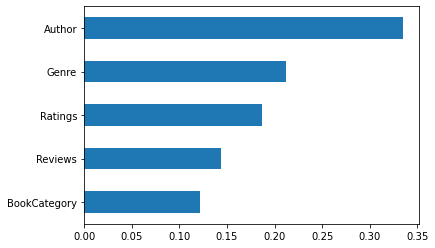

In [259]:
feat_importance = pd.Series(model.feature_importances_,index=X_train.columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()


In [260]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf_model = RandomForestRegressor()

In [261]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12) ]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10 ,15,100]
min_samples_leaf = [1,2,5,10]


In [262]:
ramdom_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' :min_samples_split,
               'min_samples_leaf' : min_samples_leaf  
}
ramdom_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [263]:
final_rf_model = RandomizedSearchCV(estimator=rf_model, param_distributions=ramdom_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5, random_state=42, n_jobs=1,verbose=2)

In [264]:
final_rf_model.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [265]:
final_rf_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [267]:
final_rf_model.score(X_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# rf_predictions = final_rf_model.predict(X_test)
# rf_predictions

array([493.79504181, 313.52873603, 634.04922549, ..., 501.6183544 ,
       495.62521539, 317.33474834])

In [ ]:
# import seaborn as sns
# from datetime import datetime
# import pickle
# sns.set()


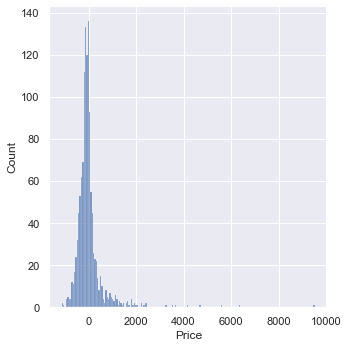

In [ ]:
# sns.displot(y_test - rf_predictions)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

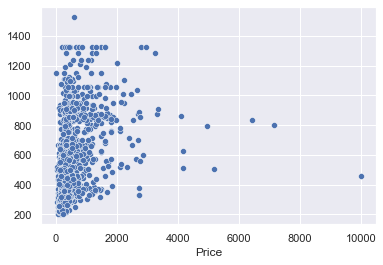

In [ ]:
# sns.scatterplot(y_test, rf_predictions)

In [ ]:
# print('MAE:', mean_absolute_error(y_test,rf_predictions) )
# print('MSE:', mean_squared_error(y_test, rf_predictions))

MAE: 313.7018257025965
MSE: 384125.12697611674


In [ ]:
# file = open('random_forest_regressor_model.pkl', 'wb')
# pickle.dump(final_rf_model, file)